In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'E:\Projects\Python\Sales_Analysis\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(columns=['Status','unnamed1'],axis=1,inplace =True)

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['Amount'] = df['Amount'].astype(int)

In [11]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


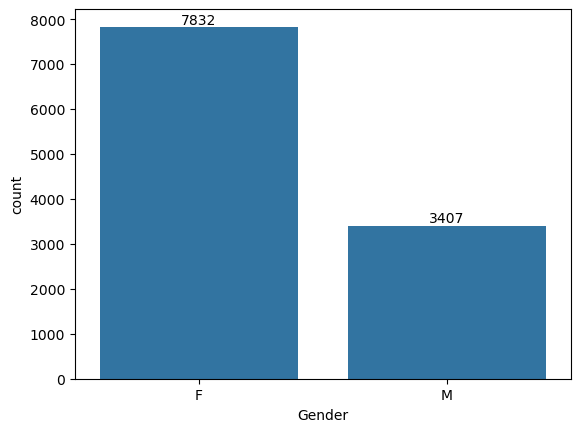

In [12]:
ax = sns.countplot(x='Gender',data =df)
for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Amount'>

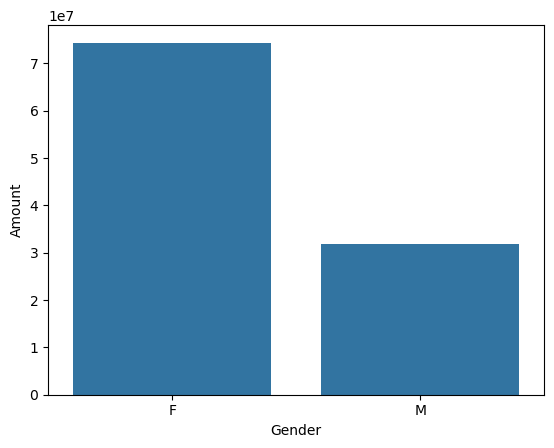

In [14]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending=False) 
sns.barplot(x='Gender',y='Amount',data=sales_gen)


From the above graph we can see that most buyers are females and the purchasing power of females is greater than men 

               Age Analysis

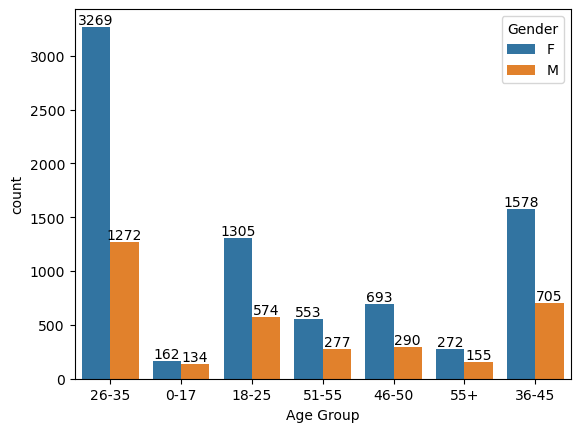

In [40]:
ax = sns.countplot(x='Age Group',hue='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

#Total Amount vs Age Group

<Axes: xlabel='Age Group', ylabel='Amount'>

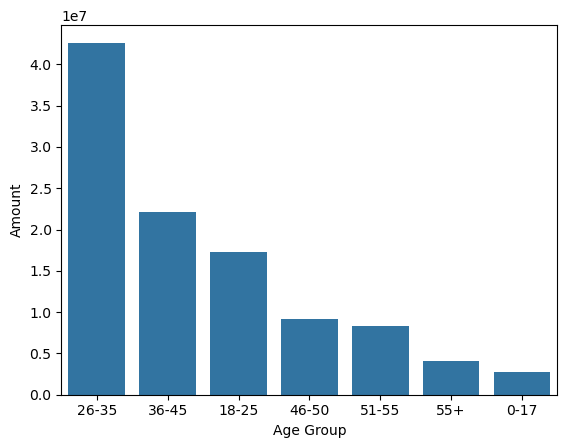

In [47]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

From above graph we see that most of the buyers are of age group 26-35

    state

In [53]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [55]:
sales_state =df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

In [57]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

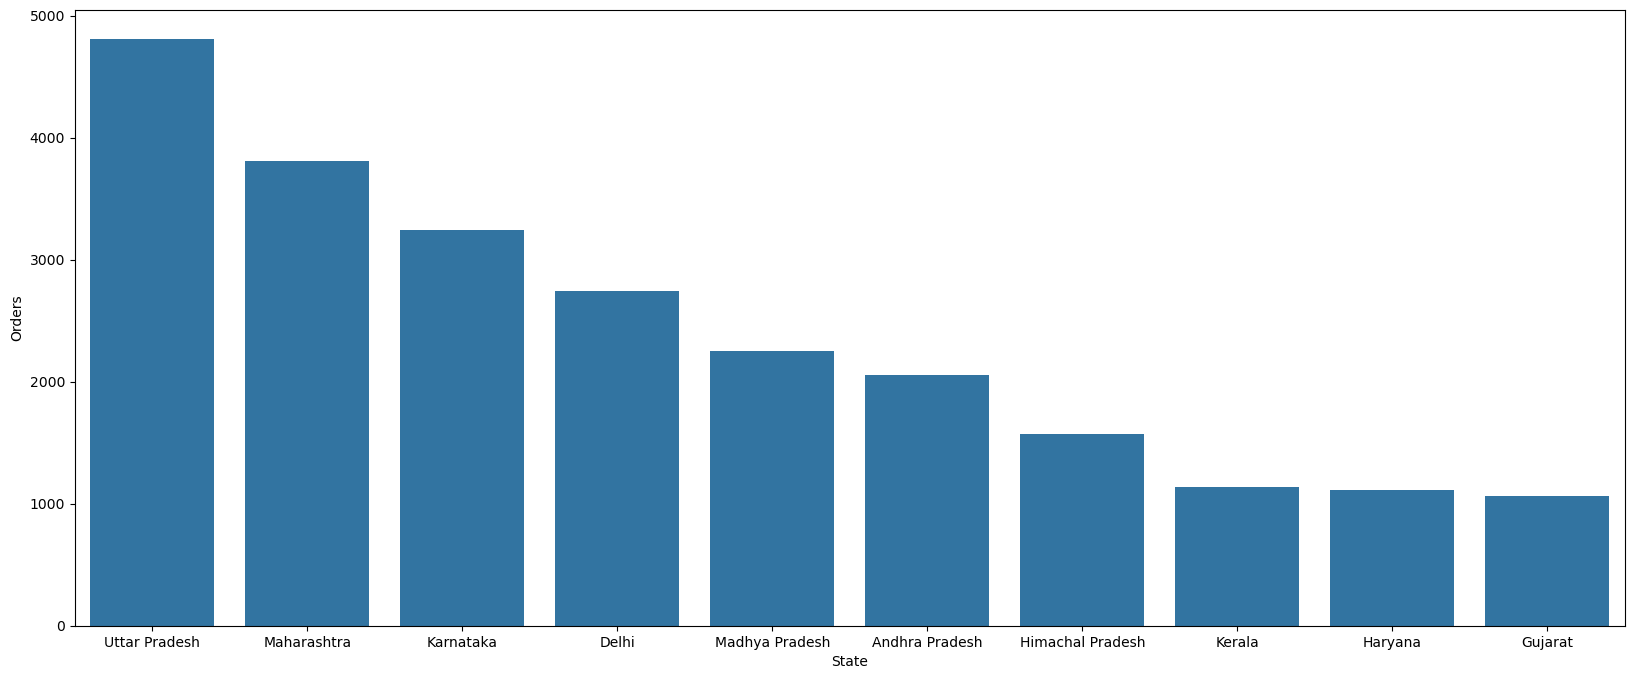

In [69]:
#Total no of orders from top 10 states
plt.figure(figsize=(20, 8))
sns.barplot(x='State',y='Orders',data=sales_state)

In [90]:
##Total amount from top 10 states

In [78]:
State_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

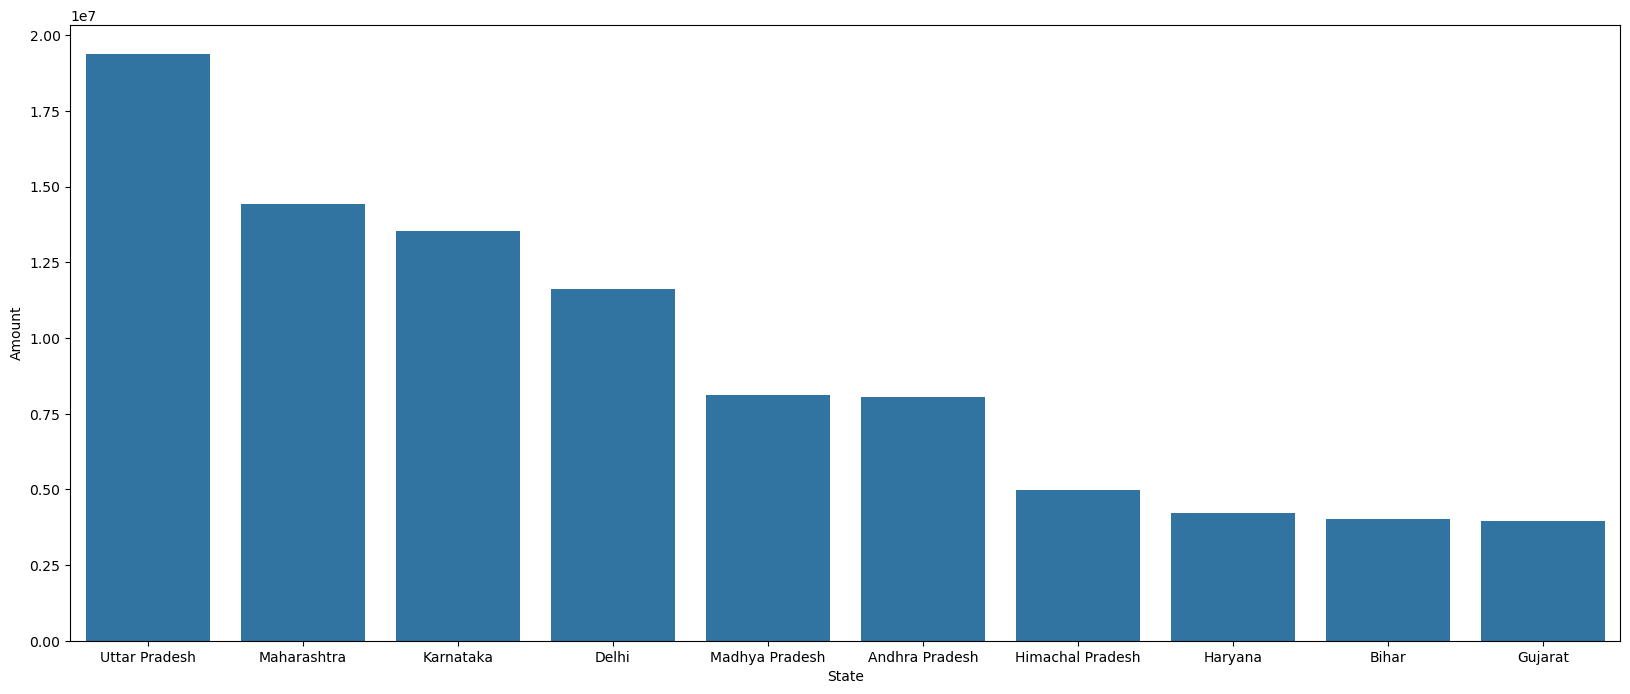

In [80]:
plt.figure(figsize=(20, 8))
sns.barplot(x='State',y='Amount',data=State_amount)

In [84]:
#From the above graph we can observe that most of the orders are from uttar pradesh,Karntaka,Maharastra.
#Total sales Amount From top 3 states by amount are uttar pradesh,Karntaka,Maharastra.

In [94]:
           #Maritial status

In [96]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [102]:
Sales_Maritalstatus = df.groupby(['Gender','Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
Sales_Maritalstatus

,Gender,Marital_Status,Amount
0,F,0,43786646
1,F,1,30549207
2,M,0,18338738
3,M,1,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

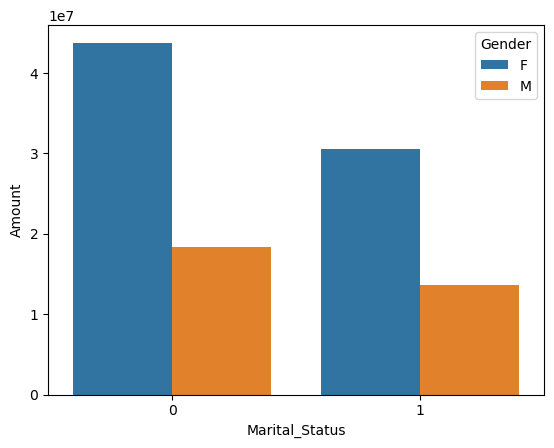

In [106]:
sns.barplot(x='Marital_Status',y='Amount',hue ='Gender',data=Sales_Maritalstatus)

In [108]:
# From the above graph,we can see most buyers are females(Married woman) and they have high purchase power.

In [113]:
                #Occupation

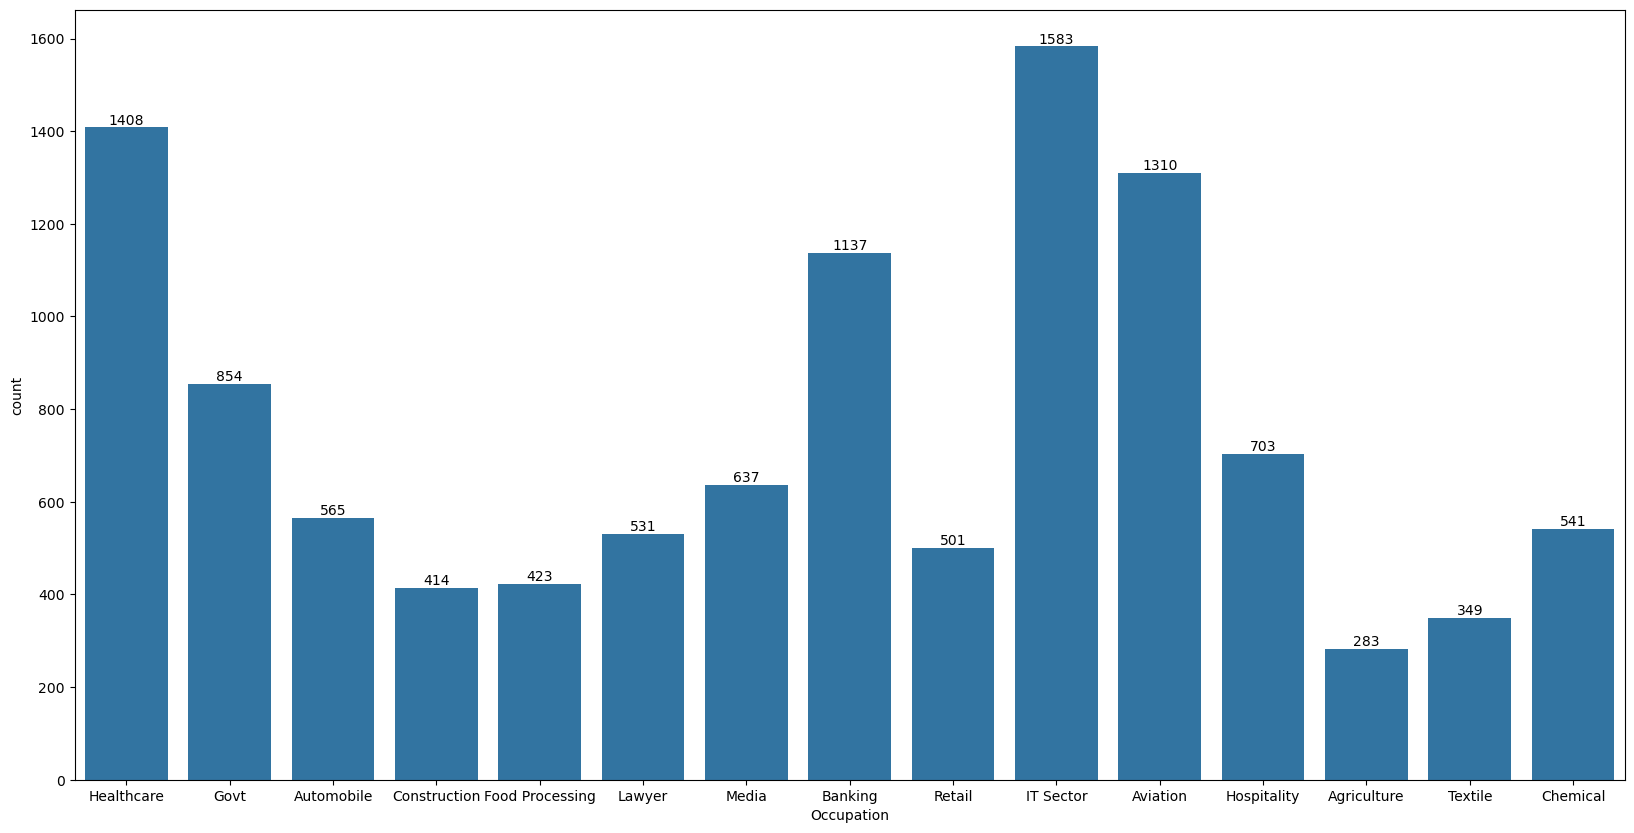

In [123]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

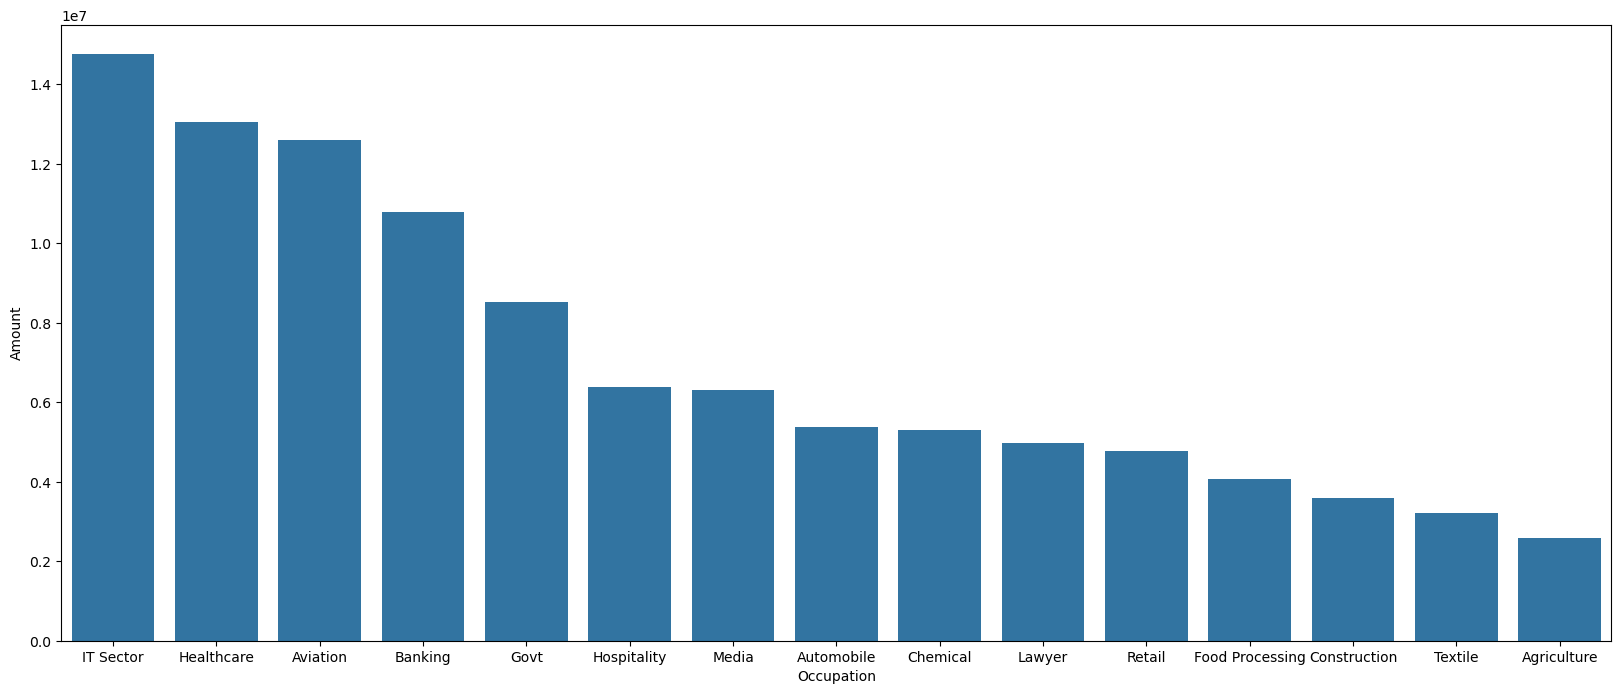

In [137]:
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False)
plt.figure(figsize=(20,8))
sns.barplot(x='Occupation',y='Amount',data =sales_occupation)

In [139]:
#From the above graph most sales are From IT Sector,Healthcare,Aviation 

                     #Product Category

In [143]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

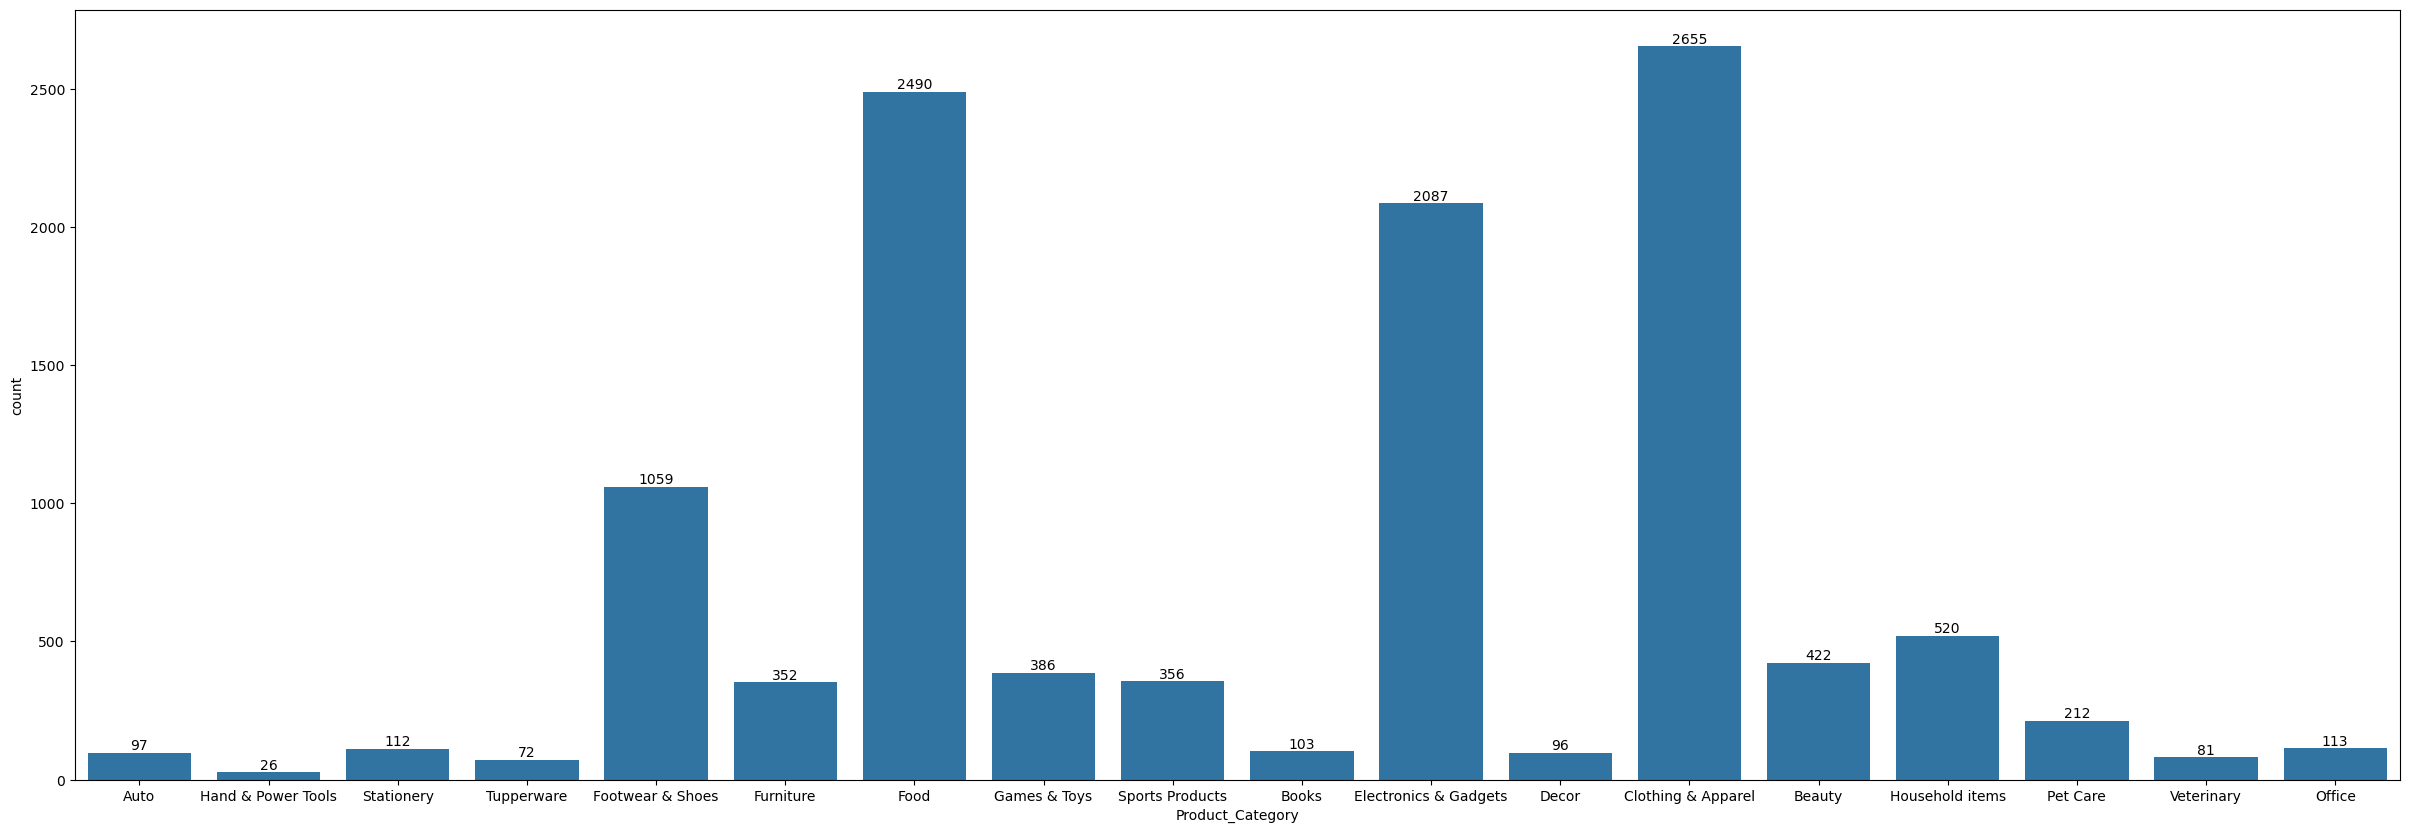

In [157]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='Product_Category',data =df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

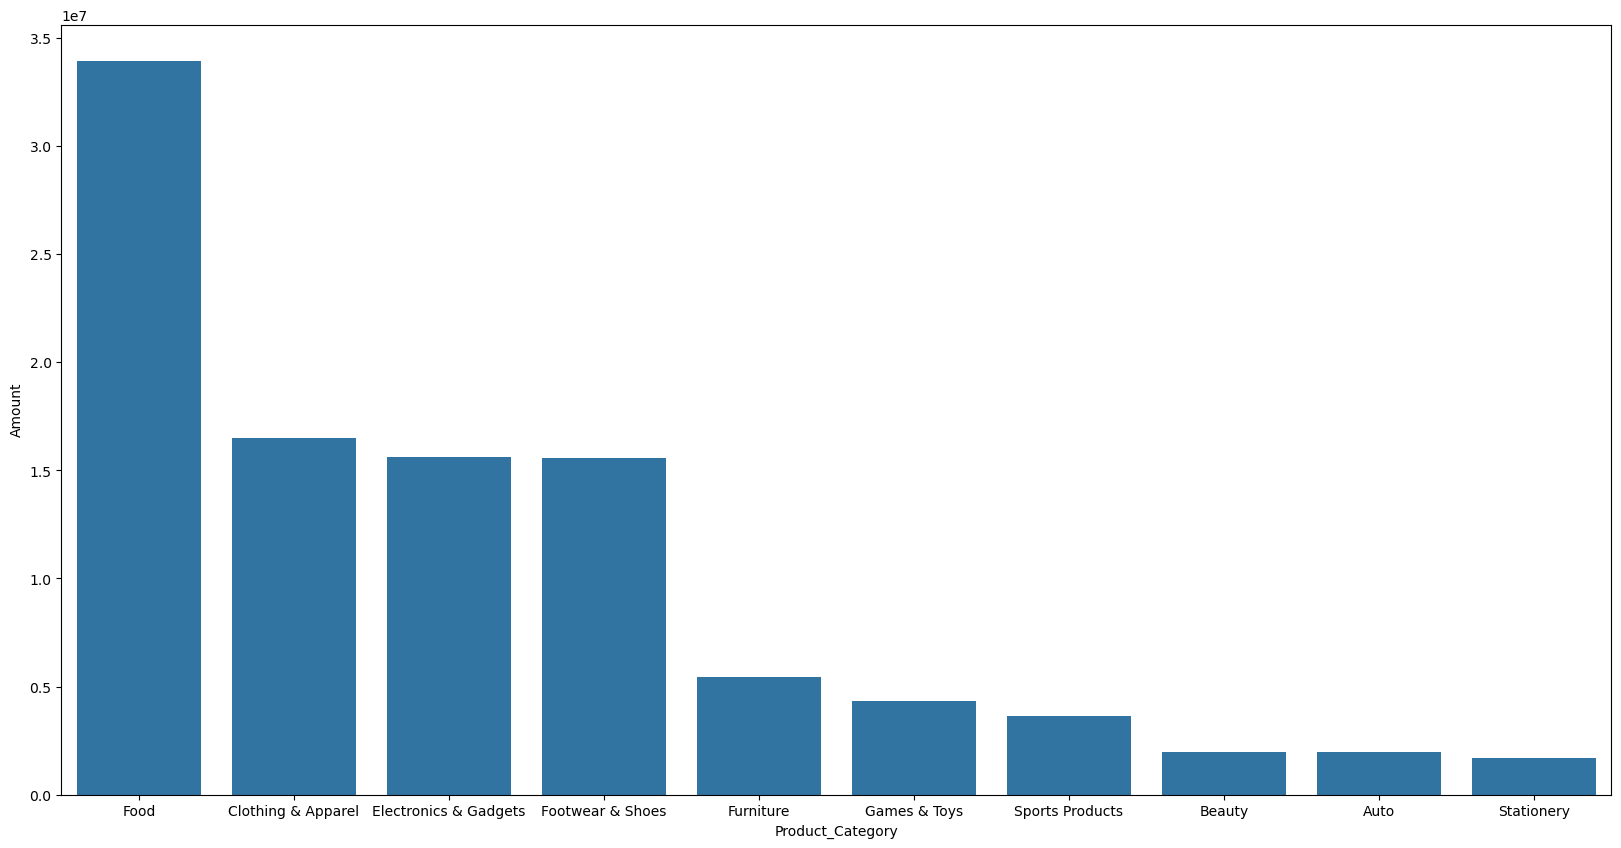

In [175]:
plt.figure(figsize=(20,10))
sales_product_category= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False).head(10)
sns.barplot(x='Product_Category',y='Amount',data =sales_product_category)

In [177]:
# From above graph we see top sales product categories are Food,clothing, Electronics  